In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [4]:
import os


In [5]:
os.chdir("C:\\Users\\DCL\\dm dataset")

In [7]:
data = pd.read_csv("student-mat.csv")

In [8]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences","famrel","freetime","goout","health"]]


In [9]:
print(data.head())


   G1  G2  G3  studytime  failures  absences  famrel  freetime  goout  health
0   5   6   6          2         0         6       4         3      4       3
1   5   5   6          2         0         4       5         3      3       3
2   7   8  10          2         3        10       4         3      2       3
3  15  14  15          3         0         2       3         2      2       5
4   6  10  10          2         0         4       4         3      2       5


In [10]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Label

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [12]:
linear = linear_model.LinearRegression()


In [13]:
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) # acc stands for accuracy 

In [14]:
print(acc)


0.9083123000455571


# Predicting on Specific Students


In [15]:
predictions = linear.predict(x_test) # Gets a list of all predictions


In [16]:
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) #prediction of each student [g1,g2.... attrites value]

8.604258630494412 [ 9  9  2  2 11  5  5  4  4] 9
17.92918612198512 [16 18  2  0  0  4  2  2  1] 19
11.380815332483987 [11 12  2  0 12  2  3  5  3] 11
12.517961039139811 [13 12  1  0  0  5  3  2  5] 12
13.636075082319904 [15 13  2  0  9  5  4  3  2] 15
10.219388894999476 [12 10  2  0 14  4  2  4  4] 11
12.704191810952368 [12 12  1  0  8  5  4  3  5] 12
14.984388304529597 [14 15  2  0  4  3  2  2  5] 15
4.78713024303 [ 6  6  2  1 13  3  2  4  4] 8
6.3464437556313555 [ 6  7  2  1 15  4  4  4  5] 8
14.450321650560833 [14 14  1  0  2  4  3  3  5] 14
14.558139985202013 [13 14  1  0  0  5  4  2  5] 13
9.214650179985963 [ 8 10  2  0  0  5  3  2  2] 12
18.291820804922473 [16 18  2  0  0  5  4  4  1] 18
8.418425979303969 [8 9 2 0 4 5 4 3 2] 10
8.948003306535206 [ 7 10  2  0  0  5  3  2  1] 11
12.610185959569906 [11 13  1  1 10  2  5  5  5] 13
-0.7633895440773277 [7 0 1 1 0 4 4 4 5] 0
12.015712318046333 [11 12  1  0  0  4  4  1  5] 10
15.63754883646523 [14 16  1  0  3  2  4  5  2] 16
4.5490046511

In [17]:
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

Coefficient: 
 [ 0.15340675  0.99053625 -0.21548423 -0.24868025  0.03633137  0.26466152
  0.05910644 -0.01011986  0.11324012]
Intercept: 
 -3.1938653365662777


# saving the model using pickle

In [19]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import style

# saving model

In [21]:
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

# linear is the name of the model we created in the last tutorial
# it should be defined above this
# filename.picle ,wb = writing mode, f = as file save #dump = dump the model into file

# Load back model

In [22]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in) #linear varible anyname

# Now we can use linear to predict grades like before

# Training Multiple Models


In [26]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
# thik will 20 times run the model and will save the higest accuracy
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.7642500688863194
Accuracy: 0.785525330334327
Accuracy: 0.9172319132555173
Accuracy: 0.9534620583445421
Accuracy: 0.8622781712314321
Accuracy: 0.7287327850419056
Accuracy: 0.8004845331534024
Accuracy: 0.7798441364501706
Accuracy: 0.788216473011517
Accuracy: 0.8969062552010489
Accuracy: 0.7978348837608945
Accuracy: 0.8324617488622446
Accuracy: 0.7673528427889111
Accuracy: 0.7655215856363747
Accuracy: 0.7459904890028841
Accuracy: 0.948722413993391
Accuracy: 0.8487839600865064
Accuracy: 0.826842326421406
Accuracy: 0.8856689356311618
Accuracy: 0.751198224347337
Accuracy: 0.8951623542883282
Accuracy: 0.8482683174251385
Accuracy: 0.7316789420725844
Accuracy: 0.9034829733140469
Accuracy: 0.8290647912586415
Accuracy: 0.7611375393063389
Accuracy: 0.9025420443087444
Accuracy: 0.685967293462947
Accuracy: 0.7203939752166288
Accuracy: 0.8371831145124473


# Plotting data

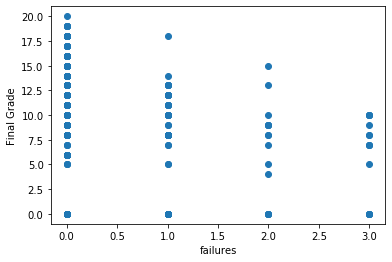

In [28]:
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
#plt.legend(loc=4)
plt.xlabel(plot) #plot = attributes #label
plt.ylabel("Final Grade")
plt.show()

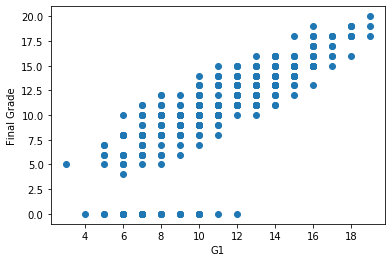

In [30]:
plot = "G1" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
#plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

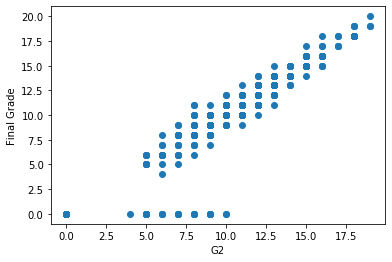

In [31]:
plot = "G2" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
#plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

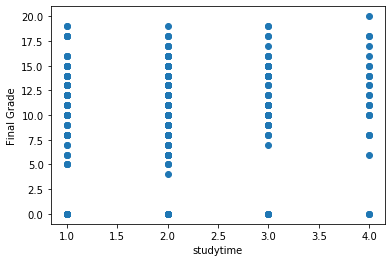

In [32]:
plot = "studytime" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
#plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

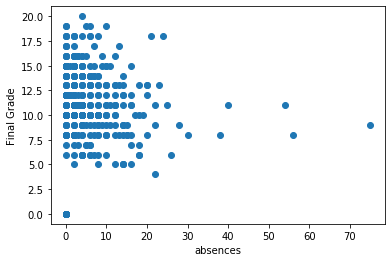

In [33]:
plot = "absences" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
#plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

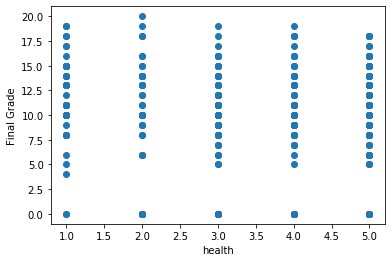

In [34]:
plot = "health" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
#plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()